# neural networkd with tfifd encoding

In [67]:
# Standard import(s)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import random as rn
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Impobrt train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Embedding, GlobalAveragePooling1D,Conv1D,MaxPool1D,Dropout, Bidirectional ,UpSampling1D, SimpleRNN,LSTM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [69]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']



In [24]:
phrases = pd.read_pickle("clean_doc.pkl").iloc[:-1, :][0]
y_labels = pd.read_pickle("clean_doc.pkl").iloc[:-1, :][2]

#create count array (sparse matrix)
vectorizer = CountVectorizer(max_features=8000)
vectorizerfit = vectorizer.fit_transform(phrases.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
sparse = pd.DataFrame(data=count_array,columns=names)

# Transform to a TF-IDF encoding
TFIDF = sklearn.feature_extraction.text.TfidfTransformer()
phrases_TFIDF = TFIDF.fit_transform(sparse)



In [99]:

x_train, x_test, y_train, y_test = train_test_split(phrases_TFIDF, y_labels, test_size=0.3, random_state=1) # 70% training and 30% test
print(x_train.shape,x_test.shape,y_train.ravel().shape)

(104930, 8000) (44971, 8000) (104930,)


In [ ]:
#Dense model

In [43]:
inputs = Input(shape=(x_train.shape[1]))
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(inputs)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
dense_tfifd = Model(inputs,output)

dense_tfifd.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8000)]            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1024128   
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528 

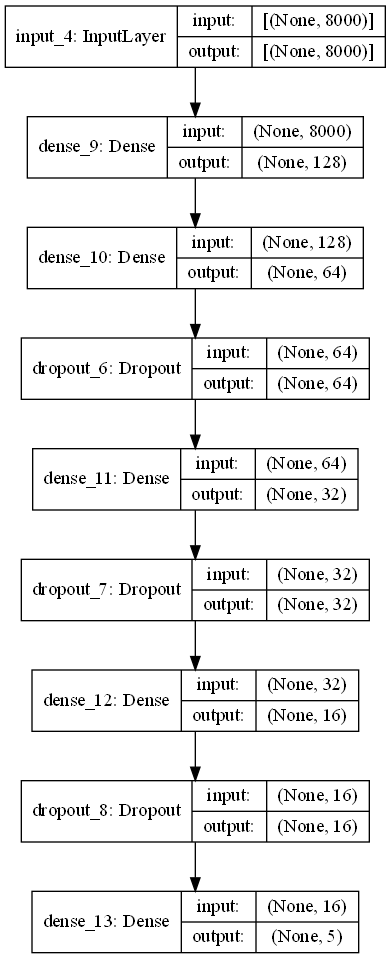

In [44]:
plot_model(dense_tfifd, show_shapes=True)

In [45]:
#compile and train model
dense_tfifd.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

dense_tf = dense_tfifd.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 83944 samples, validate on 20986 samples
Epoch 1/20
83944/83944 [==============================] - 17s 207us/sample - loss: 1.3996 - acc: 0.4444 - val_loss: 1.3407 - val_acc: 0.4772
Epoch 2/20
83944/83944 [==============================] - 16s 192us/sample - loss: 1.2692 - acc: 0.5082 - val_loss: 1.1916 - val_acc: 0.5370
Epoch 3/20
83944/83944 [==============================] - 16s 196us/sample - loss: 1.1815 - acc: 0.5383 - val_loss: 1.1683 - val_acc: 0.5392
Epoch 4/20
83944/83944 [==============================] - 17s 204us/sample - loss: 1.1393 - acc: 0.5499 - val_loss: 1.1615 - val_acc: 0.5400
Epoch 5/20
83944/83944 [==============================] - 17s 200us/sample - loss: 1.1137 - acc: 0.5568 - val_loss: 1.1634 - val_acc: 0.5398
Epoch 6/20
83944/83944 [==============================] - 16s 185us/sample - loss: 1.0910 - acc: 0.5646 - val_loss: 1.1680 - val_acc: 0.5376
Epoch 7/20
83944/83944 [==============================] - 17s 200us/sample - loss: 1.0719 - acc: 0.5730 

104930/104930 [==============================] - 15s 144us/sample - loss: 0.9659 - acc: 0.6386 - ETA: 2s - loss: 0.8898  - ETA
Overall accuracy for training dataset: 63.856858015060425%
Overall accuracy for testing dataset: 51.08402967453003%


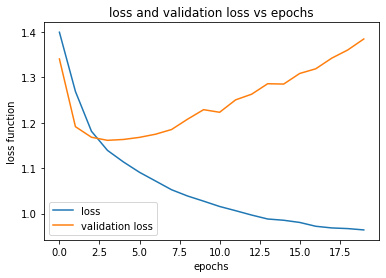

In [46]:
#evaluate accuracies
misc,testacc = dense_tfifd.evaluate(x_test,y_test)
misc,trainacc = dense_tfifd.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")


#plot loss curves

plt.plot(dense_tf.history['loss'],label="loss")
plt.plot(dense_tf.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

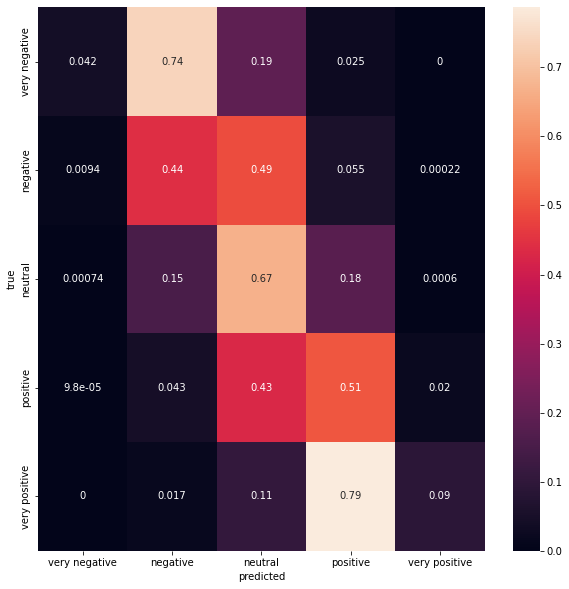

In [78]:
#confusion matrix
predicted = dense_tfifd.predict(x_test)
classfifed=predicted.argmax(axis=-1)
matrix = confusion_matrix(list(y_test),classfifed, normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# Convolutional NN

In [201]:
x_train, x_test, y_train, y_test = train_test_split(phrases_TFIDF, y_labels, test_size=0.3, random_state=1) # 70% training and 30% test


In [202]:
x_train=x_train.todense()
x_test=x_test.todense()

In [203]:
print(x_train.shape)

(104930, 8000)


In [204]:
x_train = x_train[:,:,None]
x_test = x_test[:,:,None]

In [205]:
print(x_train.shape)

(104930, 8000, 1)


In [206]:
inputs = Input(shape=(x_train.shape[1],1))
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(inputs)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)

drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
cnn_tfidf = Model(inputs,output)

cnn_tfidf.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 7998, 50)          200       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 3999, 50)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 3997, 40)          6040      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 1998, 40)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1996, 30)          3630      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 998, 30)           0   

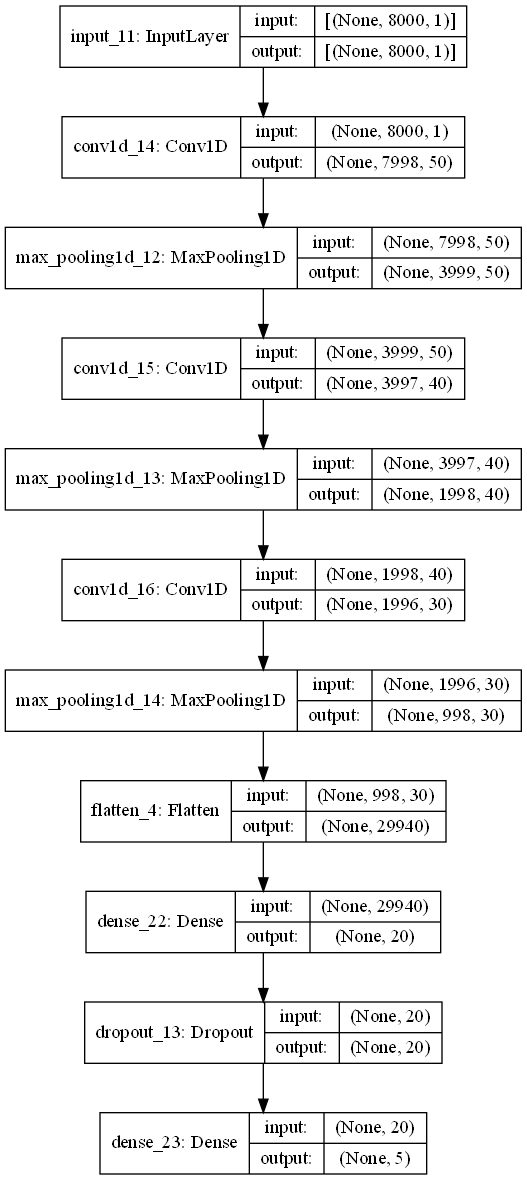

In [207]:
plot_model(cnn_tfidf, show_shapes=True)

In [208]:
#compile model
cnn_tfidf.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn_tf = cnn_tfidf.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 83944 samples, validate on 20986 samples
Epoch 1/20
83944/83944 [==============================] - 425s 5ms/sample - loss: 1.3588 - acc: 0.4408 - val_loss: 1.2793 - val_acc: 0.4457
Epoch 2/20
83944/83944 [==============================] - 422s 5ms/sample - loss: 1.2757 - acc: 0.4576 - val_loss: 1.2037 - val_acc: 0.4773
Epoch 3/20
83944/83944 [==============================] - 402s 5ms/sample - loss: 1.2220 - acc: 0.4764 - val_loss: 1.1562 - val_acc: 0.4919
Epoch 4/20
83944/83944 [==============================] - 391s 5ms/sample - loss: 1.1825 - acc: 0.4945 - val_loss: 1.1262 - val_acc: 0.5111
Epoch 5/20
83944/83944 [==============================] - 419s 5ms/sample - loss: 1.1500 - acc: 0.5095 - val_loss: 1.1143 - val_acc: 0.5108
Epoch 6/20
83944/83944 [==============================] - 416s 5ms/sample - loss: 1.1217 - acc: 0.5190 - val_loss: 1.0975 - val_acc: 0.5273
Epoch 7/20
83944/83944 [==============================] - 422s 5ms/sample - loss: 1.1016 - acc: 0.5279 - val_l

104930/104930 [==============================] - 136s 1ms/sample - loss: 0.9130 - acc: 0.5940
Overall accuracy for training dataset: 59.39769148826599%
Overall accuracy for testing dataset: 53.414422273635864%


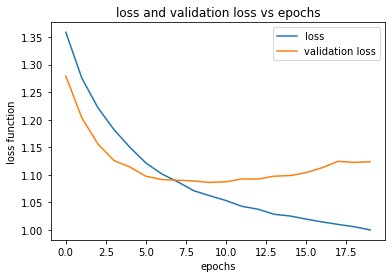

In [210]:
#evaluate accuracies
misc,testacc = cnn_tfidf.evaluate(x_test,y_test)
misc,trainacc = cnn_tfidf.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

#plot loss curves

plt.plot(cnn_tf.history['loss'],label="loss")
plt.plot(cnn_tf.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

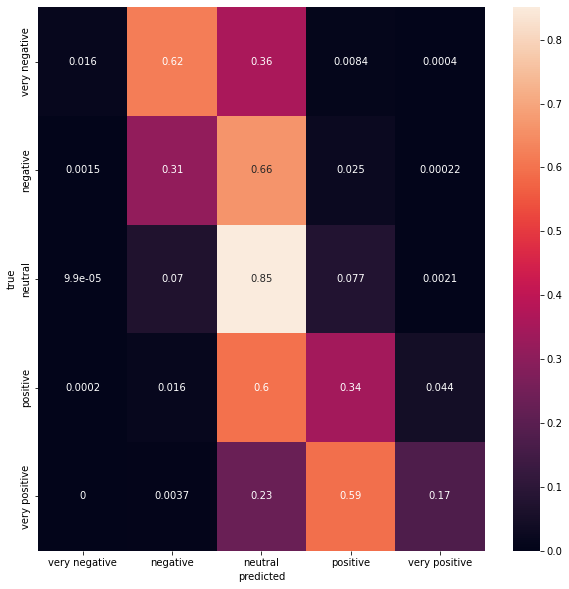

In [211]:
#confusion matrix
predicted = cnn_tfidf.predict(x_test)
classfifed=predicted.argmax(axis=-1)
matrix = confusion_matrix(list(y_test),classfifed, normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

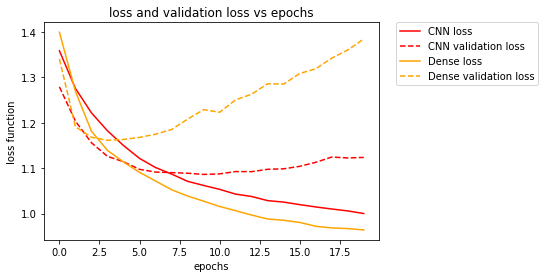

In [212]:
#compare loss curves of dense and cnn
plt.plot(cnn_tf.history['loss'], label="CNN loss", color = 'red')
plt.plot(cnn_tf.history['val_loss'],'--',label="CNN validation loss", color = 'red')

plt.plot(dense_tf.history['loss'],label="Dense loss",color = 'orange')
plt.plot(dense_tf.history['val_loss'],'--',label="Dense validation loss",color = 'orange')
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()